# **SVM Support Vector Machine**



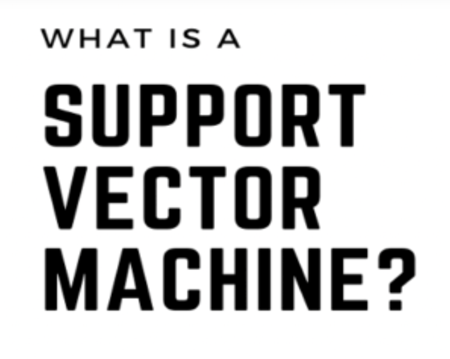

**Support Vector Machine (SVM) is a machine learning algorithm used for classification and regression tasks. However, it is mostly used for classification problems.**

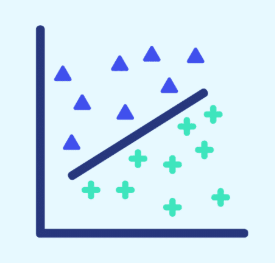

# Goal of SVM:

SVM aims to find the best boundary (decision boundary or hyperplane) that separates different classes of data points in a dataset.
This boundary helps predict the class of new data points.


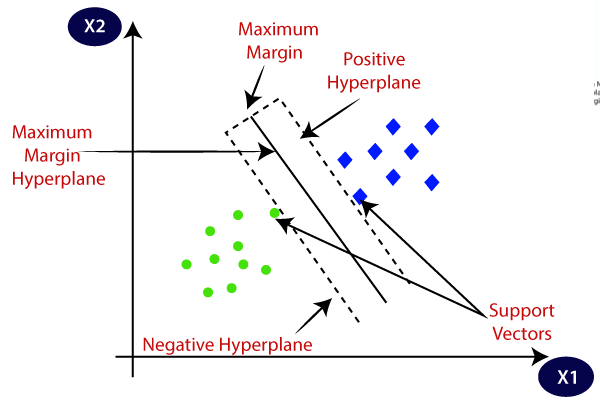

# How SVM Works:

Think of SVM as a way to draw a line (or a surface in higher dimensions) that splits data points into two groups.

It chooses the line that is as far as possible from the nearest data points of each group. These nearest points are called support vectors because they "support" the boundary.

#Key Terms in SVM:

**Hyperplane:** The decision boundary that separates classes.

**Margin:** The distance between the hyperplane and the nearest data points from each class. SVM tries to maximize this margin to make the separation robust.

# Real-Life Example:

**Email Spam Detection:**

SVM can classify emails as "spam" or "not spam" by finding the boundary that separates the two categories based on features like word frequency.

# SVM Implementation

drug.avif

#Objective:

**The objective of this project is to accurately predict the suitable drug outcomes for patients.**

# Data Description

Age - Age of the Patient

Sex - Gender of the patients

BP - Blood Pressure Levels

Cholesterol - Cholesterol Levels

Na_to_K - Sodium to potassium Ration in Blood

Drug - Drug Type

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("drug.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# Print the full data
print(df.to_string())

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
5     22   F  NORMAL        HIGH    8.607  drugX
6     49   F  NORMAL        HIGH   16.275  DrugY
7     41   M     LOW        HIGH   11.037  drugC
8     60   M  NORMAL        HIGH   15.171  DrugY
9     43   M     LOW      NORMAL   19.368  DrugY
10    47   F     LOW        HIGH   11.767  drugC
11    34   F    HIGH      NORMAL   19.199  DrugY
12    43   M     LOW        HIGH   15.376  DrugY
13    74   F     LOW        HIGH   20.942  DrugY
14    50   F  NORMAL        HIGH   12.703  drugX
15    16   F    HIGH      NORMAL   15.516  DrugY
16    69   M     LOW      NORMAL   11.455  drugX
17    43   M    HIGH        HIGH   13.972  drugA
18    23   M     LOW        HIGH    7.298  drugC
19    32   F    HIGH

EDA ( Exploratory Data Analysis )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Data Cleaning
'''
1) Check for Null/Missing value
2) Check for Duplicate records
3) Check for Outliers
'''

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Data Engineering step

In [ ]:
# Start Encoding ( Label Encoding )
from sklearn.preprocessing import LabelEncoder

'''
**Type of ENCODING TECHNIQUE ( To convert categorical values to a unique numerical value**

1) Label Encoding

Male = 0            Apple = 2
Female = 1          Banana = 1
                    Cherry = 0

2) Ordinal Encoding - will assign no according to order

                Excellent = 2
Low = 0         Poor = 0
Medium = 1      Good = 1
High = 2        


3) 1 hot Encoding

            Married     Single     Relationship
Married       1           0            0            
Single        0           1            0
Relationship  0           0            1

'''

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
encoder = LabelEncoder()

In [ ]:
list1=["Sex" , "BP" , "Cholesterol" , "Drug"]
for columns in list1:
  df[columns] = encoder.fit_transform(df[columns])

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


Model Building

In [ ]:
x=df.drop("Drug",axis=1)      # Independent variable
y= df["Drug"]     # Dependent variable

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
y

,Drug
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state=0)

In [ ]:
'''
train = Training
test = Testing

x= Independent variable
y= Dependent variable

x_train = Independent variable of Training
y_train = Dependent variable of Training

x_test= Independent variable of Testing
y_test = Dependent variable of Testing
'''

'\ntrain = Training\ntest = Testing\n\nx= Independent variable\ny= Dependent variable\n\nx_train = Independent variable of Training\ny_train = Dependent variable of Training\n\nx_test= Independent variable of Testing\ny_test = Dependent variable of Testing\n'

In [ ]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
134,42,0,0,0,21.036
66,29,1,0,0,12.856
26,31,1,0,0,30.366
113,65,0,1,1,13.769
168,51,0,1,1,23.003
...,...,...,...,...,...
67,17,1,2,1,10.832
192,72,1,1,0,16.310
117,40,0,2,0,10.103
47,68,1,1,0,10.291


In [ ]:
from sklearn.svm import SVC    # SVC - Support Vector Classifier

In [ ]:
model1 = SVC()

In [ ]:
# Training part
model1.fit(x_train , y_train)

SVC()

In [ ]:
# Testing part
predicted_value = model1.predict(x_test)

In [ ]:
# Predicted drug type
predicted_value

array([4, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4])

In [ ]:
# Actual drug type
y_test

,Drug
18,3
170,4
107,0
98,0
177,0
182,4
5,4
146,4
12,0
152,4


In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score( y_test,predicted_value )*100

82.5

In [ ]:
# 0 , 6 , 32 , 42 , 60, 100